In [43]:
import pandas as pd
import numpy as np

In [44]:
# load in and clean up the data
df_2024 = pd.read_csv(r"C:\Users\Owner\dev\football-analytics\data-scraping\fbref\scrape-red-card-games\red_card_data_2024.csv")
df_2024["year"] = "2024"

df_2023 = pd.read_csv(r"C:\Users\Owner\dev\football-analytics\data-scraping\fbref\scrape-red-card-games\red_card_data_2023.csv")
df_2023["year"] = "2023"

df_2022 = pd.read_csv(r"C:\Users\Owner\dev\football-analytics\data-scraping\fbref\scrape-red-card-games\red_card_data_2022.csv")
df_2022["year"] = "2022"

df_2021 = pd.read_csv(r"C:\Users\Owner\dev\football-analytics\data-scraping\fbref\scrape-red-card-games\red_card_data_2021.csv")
df_2021["year"] = "2021"

df = pd.concat([df_2024, df_2023, df_2022, df_2021])

df = df[df['Team'] != "0"]

np.sort(df["Team"].unique())

rename_dict = {
    "Wolverhampton Wanderers": "Wolves",
    "West Ham United": "West Ham",
    "Manchester United": "Manchester Utd",
    "Tottenham Hotspur": "Tottenham",
    "Nottingham Forest": "Nott'm Forest",
    "Nott'ham Forest": "Nott'm Forest",
    "Brighton & Hove Albion": "Brighton",
    "Newcastle United": "Newcastle Utd",
}

df["Team"] = df["Team"].replace(rename_dict)

np.sort(df["Team"].unique())

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
       'Ipswich Town', 'Leeds United', 'Leicester City', 'Liverpool',
       'Luton Town', 'Manchester City', 'Manchester Utd', 'Newcastle Utd',
       'Norwich City', "Nott'm Forest", 'Sheffield United',
       'Sheffield Utd', 'Southampton', 'Tottenham', 'Watford', 'West Ham',
       'Wolves'], dtype=object)

In [45]:
df.tail(50)

,Minute,Team,xG,PSxG,Outcome,Event Type,match_url,year
1117,29,Leeds United,0.01,0.00,Off Target,Shot,https://fbref.com/en/matches/076ca089/Brentfor...,2021
1118,31,Brentford,0.04,0.00,Off Target,Shot,https://fbref.com/en/matches/076ca089/Brentfor...,2021
1119,34,Brentford,0.07,0.08,Saved,Shot,https://fbref.com/en/matches/076ca089/Brentfor...,2021
1120,35,Brentford,0.18,0.15,Saved,Shot,https://fbref.com/en/matches/076ca089/Brentfor...,2021
1121,36,Brentford,0.01,0.00,Blocked,Shot,https://fbref.com/en/matches/076ca089/Brentfor...,2021
1122,40,Brentford,0.03,0.04,Saved,Shot,https://fbref.com/en/matches/076ca089/Brentfor...,2021
1123,43,Brentford,0.13,0.00,Off Target,Shot,https://fbref.com/en/matches/076ca089/Brentfor...,2021
1124,45,Brentford,0.03,0.00,Off Target,Shot,https://fbref.com/en/matches/076ca089/Brentfor...,2021
1125,47,Brentford,0.09,0.02,Saved,Shot,https://fbref.com/en/matches/076ca089/Brentfor...,2021
1126,53,Leeds United,0.15,0.38,Saved,Shot,https://fbref.com/en/matches/076ca089/Brentfor...,2021


In [46]:
match_df = df.groupby(["match_url", "Team"]).agg({
    "xG": "sum",
    "PSxG": "sum",
    "Outcome": lambda x: (x == "Goal").sum()
})

match_df.rename(columns={"Outcome": "Goals"}, inplace=True)

match_df.head(20)

xG  PSxG  \
match_url                                          Team                         
https://fbref.com/en/matches/0030e686/Tottenham... Leeds United    1.10  2.41   
                                                   Tottenham       1.83  1.85   
https://fbref.com/en/matches/007b352e/Bournemou... Bournemouth     0.62  1.17   
                                                   Wolves          2.42  1.31   
https://fbref.com/en/matches/01e63a1f/Bournemou... Arsenal         0.71  0.32   
                                                   Bournemouth     1.83  1.64   
https://fbref.com/en/matches/029e5f94/Everton-N... Everton         0.67  0.63   
                                                   Newcastle Utd   0.86  0.85   
https://fbref.com/en/matches/03ac4a9c/West-Ham-... Crystal Palace  1.32  1.63   
                                                   West Ham        0.28  0.00   
https://fbref.com/en/matches/03d28c48/Southampt... Leicester City  3.23  2.54   
                                                   Southampton     2.16  2.62   
https://fbref.com/en/matches/06fee8c4/Aston-Vil... Aston Villa     2.04  2.59   
                                                   Ipswich Town    0.37  1.13   
https://fbref.com/en/matches/076ca089/Brentford... Brentford       0.83  0.95   
                                                   Leeds United    1.30  1.83   
https://fbref.com/en/matches/08d5ef01/Southampt... Southampton     0.36  0.58   
                                                   Tottenham       2.33  3.07   
https://fbref.com/en/matches/0b39252e/Wolverham... Arsenal         0.99  0.72   
                                                   Wolves          0.74  0.74   

                                                                   Goals  
match_url                                          Team                   
https://fbref.com/en/matches/0030e686/Tottenham... Leeds United        3  
                                                   Tottenham           4  
https://fbref.com/en/matches/007b352e/Bournemou... Bournemouth         1  
                                                   Wolves              2  
https://fbref.com/en/matches/01e63a1f/Bournemou... Arsenal             0  
                                                   Bournemouth         2  
https://fbref.com/en/matches/029e5f94/Everton-N... Everton             1  
                                                   Newcastle Utd       0  
https://fbref.com/en/matches/03ac4a9c/West-Ham-... Crystal Palace      2  
                                                   West Ham            0  
https://fbref.com/en/matches/03d28c48/Southampt... Leicester City      3  
                                                   Southampton         2  
https://fbref.com/en/matches/06fee8c4/Aston-Vil... Aston Villa         1  
                                                   Ipswich Town        1  
https://fbref.com/en/matches/076ca089/Brentford... Brentford           1  
                                                   Leeds United        2  
https://fbref.com/en/matches/08d5ef01/Southampt... Southampton         1  
                                                   Tottenham           1  
https://fbref.com/en/matches/0b39252e/Wolverham... Arsenal             1  
                                                   Wolves              0

In [47]:
results = []

for match in df['match_url'].unique():
    match_df = df[df['match_url'] == match].sort_values('Minute')
    teams = match_df['Team'].unique()
    year = match_df['year'].iloc[0]  # Get year for this match
    
    # Initialize player counts for both teams
    team_players = {team: 11 for team in teams}
    
    # Get red card events
    red_cards = match_df[match_df['Outcome'].str.contains('Red Card', na=False)].sort_values('Minute')
    
    # Create periods list for this match
    periods = []
    
    # Add initial period (11v11)
    if len(red_cards) > 0:
        first_red = red_cards.iloc[0]
        # Add shots from start until first red
        shots_period = match_df[
            (match_df['Event Type'].str.contains('Shot', na=False)) &
            (match_df['Minute'] < first_red['Minute'])
        ]
        for team in teams:
            team_shots = shots_period[shots_period['Team'] == team]
            opp_team = teams[1] if team == teams[0] else teams[0]
            opp_shots = shots_period[shots_period['Team'] == opp_team]
            
            periods.append({
                'match_url': match,
                'year': year,  # Add year
                'period': 'equal_players',
                'start_minute': 0,
                'end_minute': first_red['Minute'],
                'minutes_in_period': first_red['Minute'],
                'team': team,
                'shots': len(team_shots),
                'xG': team_shots['xG'].sum(),
                'PSxG': team_shots['PSxG'].sum(),
                'opp_xG': opp_shots['xG'].sum(),
                'opp_PSxG': opp_shots['PSxG'].sum()
            })
    
    # Process each period between red cards
    for idx, red in red_cards.iterrows():
        # Update player count for the team that got the red
        team_players[red['Team']] -= 1
        
        # Get next period end (next red card or end of match)
        if idx < len(red_cards) - 1:
            end_minute = red_cards.iloc[idx + 1]['Minute']
        else:
            end_minute = 90  # Assuming 90 minute matches
            
        # Get shots in this period
        shots_period = match_df[
            (match_df['Event Type'].str.contains('Shot', na=False)) &
            (match_df['Minute'] > red['Minute']) &
            (match_df['Minute'] < end_minute)
        ]
        
        # Determine the state for each team
        for team in teams:
            team_shots = shots_period[shots_period['Team'] == team]
            opp_team = teams[1] if team == teams[0] else teams[0]
            opp_shots = shots_period[shots_period['Team'] == opp_team]
            
            # Determine if team has advantage, disadvantage, or equal players
            if team_players[team] > team_players[opp_team]:
                period_state = 'advantage'
            elif team_players[team] < team_players[opp_team]:
                period_state = 'disadvantage'
            else:
                period_state = 'equal_players'
            
            periods.append({
                'match_url': match,
                'year': year,  # Add year
                'period': period_state,
                'start_minute': red['Minute'],
                'end_minute': end_minute,
                'minutes_in_period': end_minute - red['Minute'],
                'team': team,
                'shots': len(team_shots),
                'xG': team_shots['xG'].sum(),
                'PSxG': team_shots['PSxG'].sum(),
                'opp_xG': opp_shots['xG'].sum(),
                'opp_PSxG': opp_shots['PSxG'].sum(),
                'team_players': team_players[team],
                'opp_players': team_players[opp_team],
                'red_card_team': red['Team']
            })
    
    results.extend(periods)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Calculate summary statistics - now including year in the grouping
summary = (results_df
    .groupby(['team', 'year', 'period'])
    .agg({
        'minutes_in_period': 'sum',
        'shots': 'sum',
        'xG': 'sum',
        'PSxG': 'sum',
        'opp_xG': 'sum',
        'opp_PSxG': 'sum'
    })
    .round(3)
)

# Add xG per minute
summary['xG_per_min'] = (summary['xG'] / summary['minutes_in_period']).round(3)
summary['opp_xG_per_min'] = (summary['opp_xG'] / summary['minutes_in_period']).round(3)

results_df[results_df["year"] == "2024"].tail(50)

,match_url,year,period,start_minute,end_minute,minutes_in_period,team,shots,xG,PSxG,opp_xG,opp_PSxG,team_players,opp_players,red_card_team
76,https://fbref.com/en/matches/9aaa6ed5/Tottenha...,2024,equal_players,0,83,83,Tottenham,7,0.75,1.05,1.58,1.66,NaN,NaN,NaN
77,https://fbref.com/en/matches/9aaa6ed5/Tottenha...,2024,equal_players,0,83,83,Fulham,14,1.58,1.66,0.75,1.05,NaN,NaN,NaN
78,https://fbref.com/en/matches/9aaa6ed5/Tottenha...,2024,advantage,83,90,7,Tottenham,1,0.02,0.00,0.00,0.00,11.0,10.0,Fulham
79,https://fbref.com/en/matches/9aaa6ed5/Tottenha...,2024,disadvantage,83,90,7,Fulham,0,0.00,0.00,0.02,0.00,10.0,11.0,Fulham
80,https://fbref.com/en/matches/e4480630/Southamp...,2024,equal_players,0,39,39,Southampton,4,1.04,1.29,2.26,3.44,NaN,NaN,NaN
81,https://fbref.com/en/matches/e4480630/Southamp...,2024,equal_players,0,39,39,Chelsea,11,2.26,3.44,1.04,1.29,NaN,NaN,NaN
82,https://fbref.com/en/matches/e4480630/Southamp...,2024,disadvantage,39,90,51,Southampton,2,0.52,0.55,3.22,2.00,10.0,11.0,Southampton
83,https://fbref.com/en/matches/e4480630/Southamp...,2024,advantage,39,90,51,Chelsea,15,3.22,2.00,0.52,0.55,11.0,10.0,Southampton
84,https://fbref.com/en/matches/6b7fbda1/Crystal-...,2024,equal_players,0,84,84,Crystal Palace,9,1.22,1.11,1.46,2.30,NaN,NaN,NaN
85,https://fbref.com/en/matches/6b7fbda1/Crystal-...,2024,equal_players,0,84,84,Manchester City,12,1.46,2.30,1.22,1.11,NaN,NaN,NaN


In [48]:

summary



minutes_in_period  shots    xG  PSxG  opp_xG  \
team    year period                                                        
Arsenal 2021 advantage                     87     17  2.23  2.05    0.17   
             disadvantage                 164      7  0.84  0.19    5.31   
             equal_players                400     58  7.23  6.53    4.69   
        2022 advantage                     28      4  0.24  0.07    0.01   
             equal_players                 62     15  2.08  1.81    1.56   
...                                       ...    ...   ...   ...     ...   
Wolves  2023 disadvantage                 113      5  0.97  1.41    5.39   
             equal_players                465     49  6.64  5.96    9.47   
        2024 advantage                     90     10  0.40  0.81    0.58   
             disadvantage                   0      0  0.00  0.00    0.00   
             equal_players                200     23  2.05  2.58    1.85   

                            opp_PSxG  xG_per_min  opp_xG_per_min  
team    year period                                               
Arsenal 2021 advantage          0.34       0.026           0.002  
             disadvantage       4.80       0.005           0.032  
             equal_players      3.95       0.018           0.012  
        2022 advantage          0.00       0.009           0.000  
             equal_players      1.11       0.034           0.025  
...                              ...         ...             ...  
Wolves  2023 disadvantage       5.82       0.009           0.048  
             equal_players      8.93       0.014           0.020  
        2024 advantage          0.75       0.004           0.006  
             disadvantage       0.00         NaN             NaN  
             equal_players      1.58       0.010           0.009  

[214 rows x 8 columns]

In [49]:
disadvantage_summary = summary.loc[(slice(None), slice(None), 'disadvantage'), :]

disadvantage_summary

minutes_in_period  shots    xG  PSxG  opp_xG  \
team        year period                                                       
Arsenal     2021 disadvantage                164      7  0.84  0.19    5.31   
            2023 disadvantage                 30      0  0.00  0.00    0.42   
            2024 disadvantage                193     12  2.22  2.47    4.85   
Aston Villa 2021 disadvantage                 43      3  0.18  0.14    1.89   
            2022 disadvantage                 28      1  0.09  0.00    0.85   
...                                          ...    ...   ...   ...     ...   
West Ham    2024 disadvantage                 59      5  0.18  0.03    1.50   
Wolves      2021 disadvantage                 82      4  0.16  0.15    4.27   
            2022 disadvantage                171     16  1.08  0.91    1.69   
            2023 disadvantage                113      5  0.97  1.41    5.39   
            2024 disadvantage                  0      0  0.00  0.00    0.00   

                               opp_PSxG  xG_per_min  opp_xG_per_min  
team        year period                                              
Arsenal     2021 disadvantage      4.80       0.005           0.032  
            2023 disadvantage      0.00       0.000           0.014  
            2024 disadvantage      4.10       0.012           0.025  
Aston Villa 2021 disadvantage      3.20       0.004           0.044  
            2022 disadvantage      0.88       0.003           0.030  
...                                 ...         ...             ...  
West Ham    2024 disadvantage      1.98       0.003           0.025  
Wolves      2021 disadvantage      3.25       0.002           0.052  
            2022 disadvantage      1.90       0.006           0.010  
            2023 disadvantage      5.82       0.009           0.048  
            2024 disadvantage      0.00         NaN             NaN  

[70 rows x 8 columns]

In [88]:
# Calculate raw means for each year
yearly_means = disadvantage_summary.groupby('year')['minutes_in_period'].mean()

# Create normalized means
normalized_means = yearly_means.copy()

# Convert index to integer if it's string
if yearly_means.index.dtype == 'O':  # 'O' indicates object/string dtype
    normalized_means.index = normalized_means.index.astype(int)

# Now the comparison with 2024 should work
normalized_means[2024] = normalized_means[2024] * (38/25)

print("\nRaw averages by year:")
print(yearly_means)
print("\nNormalized averages by year (2024 adjusted for partial season):")
print(normalized_means)

print("Average")
print(normalized_means.mean())


Raw averages by year:
year
2021    62.200000
2022    61.384615
2023    78.052632
2024    48.666667
Name: minutes_in_period, dtype: float64

Normalized averages by year (2024 adjusted for partial season):
year
2021    62.200000
2022    61.384615
2023    78.052632
2024    73.973333
Name: minutes_in_period, dtype: float64
Average
68.90264507422401



RED CARDS:
Expected reds at this stage: 1.47
Observed: 4
Probability using Poisson: 0.0624
Z-score: 2.08

Kolmogorov-Smirnov Test Results:
Normal       - statistic: 0.1949, p-value: 0.0331
Gamma        - statistic: 0.1039, p-value: 0.5924
Exponential  - statistic: 0.1738, p-value: 0.0763

MINUTES DOWN:
Expected minutes at this stage: 45.39
Observed: 193
Shape parameter: 1.94
Location parameter: 3.64
Scale parameter: 34.10
Probability using Gamma: 0.0232929719
Z-score (for reference): 21.91


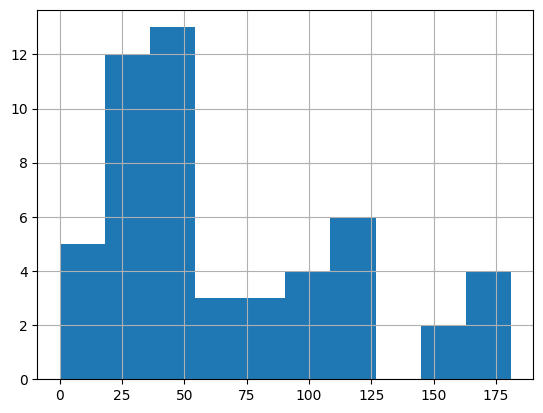

In [112]:
from scipy.stats import poisson, norm, gamma, expon, kstest

# Red Cards Analysis
expected_reds = 2.24 * (25/38)  # Scale season average of 2.24 for 25 games played
observed_reds = 4

red_poisson_prob = 1 - poisson.cdf(observed_reds-1, expected_reds)
print(f"\nRED CARDS:")
print(f"Expected reds at this stage: {expected_reds:.2f}")
print(f"Observed: {observed_reds}")
print(f"Probability using Poisson: {red_poisson_prob:.4f}")

red_z_score = (observed_reds - expected_reds) / np.sqrt(expected_reds)
red_normal_prob = 1 - norm.cdf(red_z_score)
print(f"Z-score: {red_z_score:.2f}")

# Minutes Analysis
# Fit distributions
mins_data = disadvantage_summary.loc[disadvantage_summary.index.get_level_values('year') != "2024", 'minutes_in_period']

norm_params = norm.fit(mins_data)
gamma_params = gamma.fit(mins_data)
exp_params = expon.fit(mins_data)

mins_data.hist()

distributions = [
    ('Normal', norm, norm_params),
    ('Gamma', gamma, gamma_params),
    ('Exponential', expon, exp_params)
]


print("\nKolmogorov-Smirnov Test Results:")
for name, dist, params in distributions:
    ks_statistic, p_value = kstest(mins_data, dist.cdf, args=params)
    print(f"{name:12} - statistic: {ks_statistic:.4f}, p-value: {p_value:.4f}")

expected_minutes = 69 * (25/38)  # Scale season average of 69 mins for 25 games
observed_minutes = 193

# Fit gamma distribution to the minutes data
shape, loc, scale = gamma.fit(disadvantage_summary['minutes_in_period'].values[disadvantage_summary['minutes_in_period'] > 0])

# Calculate probability of observing >= 193 minutes
gamma_prob = 1 - gamma.cdf(observed_minutes, shape, loc, scale)

print(f"\nMINUTES DOWN:")
print(f"Expected minutes at this stage: {expected_minutes:.2f}")
print(f"Observed: {observed_minutes}")
print(f"Shape parameter: {shape:.2f}")
print(f"Location parameter: {loc:.2f}")
print(f"Scale parameter: {scale:.2f}")
print(f"Probability using Gamma: {gamma_prob:.10f}")

# Including z-score for reference
min_z_score = (observed_minutes - expected_minutes) / np.sqrt(expected_minutes)
print(f"Z-score (for reference): {min_z_score:.2f}")


In [99]:
# Reset index to get team as a column, then group by team
flat_disadvantage = disadvantage_summary.reset_index()

flat_disadvantage = flat_disadvantage[flat_disadvantage["year"] == "2024"]

# Calculate total minutes per team
team_total_minutes = flat_disadvantage.groupby('team')['minutes_in_period'].sum()

# Set minimum total minutes threshold
min_total_minutes = 40  # adjust this to your desired minimum

# Get teams that meet the minimum
qualified_teams = team_total_minutes[team_total_minutes >= min_total_minutes].index

# Filter data for only qualified teams
filtered_disadvantage = flat_disadvantage[flat_disadvantage['team'].isin(qualified_teams)]

# Now calculate the means
print("Overall means (teams with min total minutes:", min_total_minutes, "):")
print("xG per min:", filtered_disadvantage["xG_per_min"].mean())
print("Opponent xG per min:", filtered_disadvantage["opp_xG_per_min"].mean())

# Team-by-team means
team_means = filtered_disadvantage.groupby('team').agg({
    'xG_per_min': 'mean',
    'opp_xG_per_min': 'mean',
    'minutes_in_period': 'sum'  # Shows total minutes
}).sort_values('xG_per_min', ascending=False)

# Drop rows with NaN values if needed
team_means = team_means.dropna()

print("\nTeam-by-team means:")
print(team_means.round(4))

Overall means (teams with min total minutes: 40 ):
xG per min: 0.006888888888888889
Opponent xG per min: 0.027666666666666662

Team-by-team means:
                xG_per_min  opp_xG_per_min  minutes_in_period
team                                                         
Liverpool            0.022           0.014                 74
Arsenal              0.012           0.025                193
Southampton          0.007           0.053                 79
Manchester Utd       0.006           0.024                 91
Newcastle Utd        0.004           0.022                 62
Aston Villa          0.003           0.041                 58
Ipswich Town         0.003           0.030                 84
West Ham             0.003           0.025                 59
Brentford            0.002           0.015                 49


In [100]:
xg_per_min_avg = 0.016025

red_card_attacking_change = (filtered_disadvantage["xG_per_min"].mean() - xg_per_min_avg)/ xg_per_min_avg
red_card_defensive_change = (filtered_disadvantage["opp_xG_per_min"].mean() - xg_per_min_avg)/ xg_per_min_avg

print(f"Change in attacking performance from league avg: {red_card_attacking_change*100:.2f}%")
print(f"Change in defensive performance from league avg: {red_card_defensive_change*100:.2f}%")

Change in attacking performance from league avg: -57.01%
Change in defensive performance from league avg: 72.65%


In [101]:
all_match_df = pd.read_csv(r"C:\Users\Owner\dev\football-analytics\data-scraping\fbref\scrape-game-shots\shot_data_prem_2024.csv")

rename_dict = {
    "Wolverhampton Wanderers": "Wolves",
    "West Ham United": "West Ham",
    "Manchester United": "Manchester Utd",
    "Tottenham Hotspur": "Tottenham",
    "Nottingham Forest": "Nott'm Forest",
    "Nott'ham Forest": "Nott'm Forest",
    "Brighton & Hove Albion": "Brighton",
    "Newcastle United": "Newcastle Utd",
}

all_match_df["Team"] = all_match_df["Team"].replace(rename_dict)

def analyse_non_red_card_performance(df):
    teams = df[df['Team'] != '0']['Team'].unique()
    team_stats = []
    
    for team in teams:
        matches = df[df['Team'] == team]['match_url'].unique()
        
        for match in matches:
            match_df = df[df["match_url"] == match]
            
            if team in match_df["Team"].values:
                has_red_card = match_df["Event Type"].str.contains("red", case=False).any()
                
                if not has_red_card:
                    team_xg = match_df[match_df["Team"] == team]["xG"].sum()
                    opposition_xg = match_df[
                        (match_df["Team"] != team) & 
                        (match_df["Team"] != "0")
                    ]["xG"].sum()
                    
                    team_stats.append({
                        "team": team,
                        "xG": team_xg,
                        "opp_xG": opposition_xg,
                        "minutes": 90
                    })
    
    stats_df = pd.DataFrame(team_stats)
    
    team_means = stats_df.groupby('team').agg({
        'xG': 'sum',
        'opp_xG': 'sum',
        'minutes': 'sum'
    })
    
    team_means['xG_per_min'] = team_means['xG'] / team_means['minutes']
    team_means['opp_xG_per_min'] = team_means['opp_xG'] / team_means['minutes']
    
    team_means = team_means[team_means['minutes'] >= 40]
    
    return team_means

# Calculate both attacking and defensive changes
normal_performance = analyse_non_red_card_performance(all_match_df)

In [102]:
import plotly.graph_objects as go
from datetime import datetime

current_date = datetime.now().strftime("%d %b %Y")

common_teams = sorted(list(set(team_means.index) & set(normal_performance.index)))

# Create plot DataFrame only for teams that appear in both datasets
plot_df = pd.DataFrame({
    'team': common_teams,
    'Attacking': ((team_means.loc[common_teams, 'xG_per_min'] - 
                  normal_performance.loc[common_teams, 'xG_per_min']) / 
                 normal_performance.loc[common_teams, 'xG_per_min']) * 100,
    'Defensive Vulnerability': ((team_means.loc[common_teams, 'opp_xG_per_min'] - 
                               normal_performance.loc[common_teams, 'opp_xG_per_min']) / 
                              normal_performance.loc[common_teams, 'opp_xG_per_min']) * -100
}).reset_index(drop=True)

# Sort by total impact
plot_df['total_impact'] = plot_df['Attacking'] + plot_df['Defensive Vulnerability']
plot_df.sort_values('total_impact', ascending=True, inplace=True)
# Create figure
fig = go.Figure()

# Add bars for attacking changes
fig.add_trace(
   go.Bar(
       x=plot_df['Attacking'],
       y=plot_df['team'],
       orientation='h',
       name='Attack Impact',
       marker_color='#f99820',
       text=plot_df['Attacking'].round(1).astype(str) + '%',
       textposition='auto',
   )
)

# Add bars for defensive changes
fig.add_trace(
   go.Bar(
       x=plot_df['Defensive Vulnerability'],
       y=plot_df['team'],
       orientation='h',
       name='Defense Impact',
       marker_color='#2081f9',
       text=plot_df['Defensive Vulnerability'].round(1).astype(str) + '%',
       textposition='auto',
   )
)

# Update layout
fig.update_layout(
   title={
       'text': 'Red Card Effect on Team Attacking and Defensive xG<br><span style="font-size: 14px;">Premier League 2024/25</span>',
       'y': 0.95,
       'x': 0.52,
       'xanchor': 'center',
       'yanchor': 'top',
       'font': {'size': 20, 'weight': 'bold'}
   },
   plot_bgcolor='#1f2937',
   paper_bgcolor='#1f2937',
   font={'color': 'white'},
   height=800,
   width=1000,
   margin=dict(l=30, r=10, t=100, b=70),
   barmode='group',
   bargap=0.4,
   showlegend=True,
   legend=dict(
       yanchor="bottom",
       y=1.0,
       xanchor="center",
       x=0.45,
       orientation="h"
   ),
    xaxis=dict(
        showgrid=True,
        gridcolor='rgba(255, 255, 255, 0.1)',
        zeroline=True,
        zerolinecolor='rgba(255, 255, 255, 0.5)',
        title='Change in xG per Minute vs Team average (%)',
        range=[-250, 150]  # Adjust this range to match your actual data values
    ),
   yaxis=dict(
       showgrid=False,
       zeroline=False,
       ticksuffix=' '
   ),
   annotations=[
       dict(
           text=f"@porterhouse26 • {current_date}",
           xref="paper",
           yref="paper",
           x=1,
           y=-0.1,
           showarrow=False,
           font=dict(size=12, color='gray'),
           xanchor='right'
       )
   ]
)

# Save as HTML
fig.write_html("performance_impact.html")

In [103]:
import plotly.graph_objects as go
from datetime import datetime


current_date = datetime.now().strftime("%d %b %Y")
plot_df = disadvantage_summary.reset_index()

plot_df = plot_df[plot_df["year"] == "2024"]

plot_df.sort_values('minutes_in_period', inplace=True)

# Create figure
fig = go.Figure()

# Add bars
fig.add_trace(
    go.Bar(
        x=plot_df['minutes_in_period'],
        y=plot_df['team'],
        orientation='h',
        marker_color='#EC325A',  
        text=plot_df['minutes_in_period'].astype(str) + ' min',
        textposition='inside',
    )
)

# Update layout for dark theme
fig.update_layout(
    title={
        'text': 'Minutes Played with a Player Disadvantage<br><span style="font-size: 14px;">Premier League 2024/25</span>',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'weight': 'bold'}
    },
    plot_bgcolor='#1f2937',  # Dark background
    paper_bgcolor='#1f2937',
    font={'color': 'white'},
    height=800,  # Taller to fit all teams
    width=900,
    margin=dict(l=30, r=10, t=80, b=70),
    showlegend=False,
    xaxis=dict(
        showgrid=True,
        gridcolor='rgba(255, 255, 255, 0.1)',
        zeroline=False,
        title='Minutes'
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        ticksuffix=' '
    ),
    annotations=[
        dict(
            text=f"@porterhouse26 • {current_date}",  
            xref="paper",
            yref="paper",
            x=1,
            y=-0.1,
            showarrow=False,
            font=dict(size=12, color='gray'),
            xanchor='right'
        )
    ]
)

# Update bar configurations
fig.update_traces(
    marker_line_color='#1f2937',
    marker_line_width=1,
    opacity=0.8
)

# Save as HTML (interactive)
fig.write_html("disadvantage_minutes_2024.html")


In [104]:
import plotly.graph_objects as go
from datetime import datetime


current_date = datetime.now().strftime("%d %b %Y")
plot_df = disadvantage_summary.reset_index()

plot_df = plot_df[plot_df["year"] == "2024"]

plot_df.sort_values('minutes_in_period', inplace=True)

# Create figure
fig = go.Figure()

# Add bars
fig.add_trace(
    go.Bar(
        x=plot_df['minutes_in_period'],
        y=plot_df['team'],
        orientation='h',
        marker_color='#EC325A',  
        text=plot_df['minutes_in_period'],
        textposition='outside',
    )
)

# Update layout for dark theme
fig.update_layout(
    title={
        'text': 'Minutes Played with a Player Disadvantage<br><span style="font-size: 14px;">Premier League 2024/25</span>',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'weight': 'bold'}
    },
    plot_bgcolor='#1f2937',  # Dark background
    paper_bgcolor='#1f2937',
    font={'color': 'white'},
    height=800,  # Taller to fit all teams
    width=900,
    margin=dict(l=30, r=10, t=80, b=70),
    showlegend=False,
    xaxis=dict(
        showgrid=True,
        gridcolor='rgba(255, 255, 255, 0.1)',
        zeroline=False,
        title='Minutes'
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        ticksuffix=' '
    ),
    annotations=[
        dict(
            text=f"@porterhouse26 • {current_date}",  
            xref="paper",
            yref="paper",
            x=1,
            y=-0.1,
            showarrow=False,
            font=dict(size=12, color='gray'),
            xanchor='right'
        )
    ]
)

# Update bar configurations
fig.update_traces(
    marker_line_color='#1f2937',
    marker_line_width=1,
    opacity=0.8
)

# Save as HTML (interactive)
fig.write_html("disadvantage_minutes_2024.html")


In [105]:
import plotly.graph_objects as go
from datetime import datetime

current_date = datetime.now().strftime("%d %b %Y")
plot_df = disadvantage_summary.reset_index()

# Calculate total minutes per team for sorting
total_minutes_df = plot_df.groupby('team')['minutes_in_period'].sum().sort_values(ascending=False)
team_order = total_minutes_df.index.tolist()

# Create figure
fig = go.Figure()

# Define colors for different years
colors = {
    '2024': '#e67e22',  # Orange
    '2023': '#2ecc71',  # Green
    '2022': '#3498db'   # Blue
}

# Add bars for each year
for year in sorted(plot_df['year'].unique()):
    year_df = plot_df[plot_df['year'] == year]
    
    # For teams not in this year, we need to add them with 0 minutes
    missing_teams = set(team_order) - set(year_df['team'])
    zeros_df = pd.DataFrame({
        'team': list(missing_teams),
        'year': year,
        'minutes_in_period': 0
    })
    
    year_df = pd.concat([year_df, zeros_df])
    year_df = year_df.set_index('team').reindex(team_order).reset_index()
    
    # Only show text label for the last bar segment that has minutes
    text = None
    if year == max(plot_df['year'].unique()):
        text = total_minutes_df[year_df['team']].round(1).astype(str)
    
    fig.add_trace(
        go.Bar(
            x=year_df['minutes_in_period'],
            y=year_df['team'],
            orientation='h',
            name=str(year),
            marker_color=colors.get(str(year), '#EC325A'),
            text=text,
            textposition='outside',
            showlegend=True
        )
    )

# Update layout for dark theme
fig.update_layout(
    barmode='stack',
    title={
        'text': 'Minutes Played with a Player Disadvantage by Year<br><span style="font-size: 14px;">Premier League</span>',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'weight': 'bold'}
    },
    plot_bgcolor='#1f2937',
    paper_bgcolor='#1f2937',
    font={'color': 'white'},
    height=800,
    width=900,
    margin=dict(l=30, r=25, t=80, b=70),
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.005,
        xanchor="right",
        x=1,
        traceorder="normal"
    ),
    xaxis=dict(
        showgrid=True,
        gridcolor='rgba(255, 255, 255, 0.1)',
        zeroline=False,
        title='Minutes'
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        ticksuffix=' ',
        autorange='reversed'  # This will maintain the order
    ),
    annotations=[
        dict(
            text=f"@porterhouse26 • {current_date}",
            xref="paper",
            yref="paper",
            x=1.01,
            y=-0.1,
            showarrow=False,
            font=dict(size=12, color='gray'),
            xanchor='right'
        )
    ]
)

# Update bar configurations
fig.update_traces(
    marker_line_color='#1f2937',
    marker_line_width=1,
    opacity=0.8
)

# Save as HTML (interactive)
fig.write_html("disadvantage_minutes_all_years.html")

In [106]:
import plotly.graph_objects as go
from datetime import datetime

current_date = datetime.now().strftime("%d %b %Y")
plot_df = disadvantage_summary.reset_index()


plot_df.loc[plot_df["year"] == "2024", "minutes_in_period"] = (plot_df[plot_df["year"] == "2024"]["minutes_in_period"] / 24) * 38
plot_df.loc[plot_df["year"] == "2023", "minutes_in_period"] = plot_df[plot_df["year"] == "2023"]["minutes_in_period"] 
plot_df.loc[plot_df["year"] == "2022", "minutes_in_period"] = plot_df[plot_df["year"] == "2022"]["minutes_in_period"] 

total_minutes_df = plot_df.groupby('team')['minutes_in_period'].sum().sort_values(ascending=False)
team_order = total_minutes_df.index.tolist()

# Create figure
fig = go.Figure()

# Define colors for different years
colors = {
    '2024': '#e67e22',  # Orange
    '2023': '#2ecc71',  # Green
    '2022': '#3498db'   # Blue
}

# Add bars for each year
for year in sorted(plot_df['year'].unique()):
    year_df = plot_df[plot_df['year'] == year]
    
    # For teams not in this year, we need to add them with 0 minutes
    missing_teams = set(team_order) - set(year_df['team'])
    zeros_df = pd.DataFrame({
        'team': list(missing_teams),
        'year': year,
        'minutes_in_period': 0
    })
    
    year_df = pd.concat([year_df, zeros_df])
    year_df = year_df.set_index('team').reindex(team_order).reset_index()
    
    fig.add_trace(
        go.Bar(
            x=year_df['minutes_in_period'],
            y=year_df['team'],
            orientation='h',
            name=str(year),
            marker_color=colors.get(str(year), '#EC325A'),
            showlegend=True
        )
    )

# Update layout for dark theme
fig.update_layout(
    barmode='stack',
    title={
        'text': 'Minutes Played with a Player Disadvantage by Year (Normalised by Games Played)<br><span style="font-size: 12px;">Premier League</span>',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 15, 'weight': 'bold'}
    },
    plot_bgcolor='#1f2937',
    paper_bgcolor='#1f2937',
    font={'color': 'white'},
    height=800,
    width=900,
    margin=dict(l=30, r=25, t=80, b=70),
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.005,
        xanchor="right",
        x=1,
        traceorder="normal"
    ),
    xaxis=dict(
        showgrid=True,
        gridcolor='rgba(255, 255, 255, 0.1)',
        zeroline=False,
        title='Minutes'
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        ticksuffix=' ',
        autorange='reversed'  # This will maintain the order
    ),
    annotations=[
        dict(
            text=f"@porterhouse26 • {current_date}",
            xref="paper",
            yref="paper",
            x=1.01,
            y=-0.1,
            showarrow=False,
            font=dict(size=12, color='gray'),
            xanchor='right'
        )
    ]
)

# Update bar configurations
fig.update_traces(
    marker_line_color='#1f2937',
    marker_line_width=1,
    opacity=0.8
)

# Save as HTML (interactive)
fig.write_html("disadvantage_minutes_all_years_normalised.html")

C:\Users\Owner\AppData\Local\Temp\ipykernel_2588\543000220.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[305.58333333  91.83333333  77.58333333  49.08333333   0.
  22.16666667  38.          52.25       133.         117.16666667
   9.5        144.08333333  98.16666667  30.08333333 125.08333333
   0.          93.41666667   0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

